# Analyse einer Twitter-Abfrage zum Wort vegan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Achtung: Nehmt eure eigenen Pfade mit meinen wirds nicht funktionieren!**

In [2]:
# Laden der Dataframes 
## TW ....csv sind Tweets
## RT ...csv sind Retweets
tweets_df = pd.read_csv('../data/TW_vegan_2021-03-24.csv')
retweets_df = pd.read_csv('../data/RT_vegan_2021-03-24.csv')

### Zahl der twetter und ihrer tweets
Wieviele tweeter und retweeter sind in der Abfrage?

In [3]:
tweeter = tweets_df["user_name"].unique()
tweets = tweets_df["tweet_id"].unique()
tweet_fol_max = tweets_df["followers_count"].max()
tweet_fol_avg = tweets_df["followers_count"].mean()
tweet_fol_median = tweets_df["followers_count"].median()
tweet_friends_max = tweets_df["friends_count"].max()
tweet_favourite_median = tweets_df["favourite_count"].median()
tweet_favourite_max = tweets_df["favourite_count"].max()

print("tweeter" ,len(tweeter), "\n-> ihre tweets",len(tweets), "\n-> followers max", tweet_fol_max, "avg", tweet_fol_avg, 
      "median", tweet_fol_median,"\n-> friends max", tweet_friends_max, "\n-> gefällt mir max" ,tweet_favourite_max, "median", tweet_favourite_median)

tweeter 32 
-> ihre tweets 45 
-> followers max 49690042 avg 1696585.2 median 179193.0 
-> friends max 89013 
-> gefällt mir max 10754 median 122.0


In [4]:
retweeter = retweets_df["user_name"].unique()
retweets = retweets_df["tweet_id"].unique()
retweets_median = retweets_df["retweet_count"].median()
retweets_quant_09 = retweets_df["retweet_count"].quantile(0.9)
retweets_max = retweets_df["retweet_count"].max()
retweet_fol_max = retweets_df["followers_count"].max()
retweets_fol_quant_09 = retweets_df["followers_count"].quantile(0.9)
retweet_friends_max = retweets_df["friends_count"].max()


print("retweeter" ,len(retweeter), "\n-> ihre retweets",len(retweets),
      "\n-> retweets Median",retweets_median," nur 10% haben mehr als" ,retweets_quant_09," retweets  - max", retweets_max,
      "\n-> followers max", retweet_fol_max," nur 10% haben mehr als ",retweets_fol_quant_09,"followers",
      "\n-> friends max", retweet_friends_max)

retweeter 686 
-> ihre retweets 767 
-> retweets Median 35.0  nur 10% haben mehr als 134.0  retweets  - max 464 
-> followers max 1081206  nur 10% haben mehr als  3531.0 followers 
-> friends max 66595


In [5]:
# 1000 Gesammelte Tweets
## Primärschlüssel tweet_id
print(tweets_df.shape)
tweets_df.head(3)

(45, 18)


Unnamed: 0             tweet_id                   creation_date  \
0           0  1374153315529990147  Tue Mar 23 00:17:35 +0000 2021   
1           1  1374381768866816012  Tue Mar 23 15:25:23 +0000 2021   
2           2  1374372252179779594  Tue Mar 23 14:47:34 +0000 2021   

                                           full_text  \
0  @juliensolomita Wishing a very loud "EH BEP BE...   
1  A reminder: zoonotic spillover often has nothi...   
2  A reminder: in a vegan world there would be no...   

                               mentions entities_hashtags  \
0  ['juliensolomita', 'juliensolomita']                []   
1                                    []                []   
2                                    []  ['veganforlife']   

              user_name user_screen_name    user_id     location  \
0                 Petco            Petco   17396566          NaN   
1  Dr. Angela Rasmussen  angie_rasmussen  394087611  Seattle, WA   
2              moby XⓋX   thelittleidiot   14464766          l.a   

                                         description  protected  \
0  We’re setting a new standard for pet health an...      False   
1  Excessively direct virologist. Affiliate @geor...      False   
2  bald alien. adopted son of john waters. lover ...      False   

   followers_count  friends_count              profile_created_at  \
0           179193           5602  Fri Nov 14 21:46:13 +0000 2008   
1           209339           4848  Wed Oct 19 15:10:56 +0000 2011   
2          1159108           1992  Mon Apr 21 17:53:55 +0000 2008   

   retweet_count  favourite_count search_key  
0            808            10754      vegan  
1            503             2224      vegan  
2            464             2232      vegan

In [6]:
# Gesammelte Retweets auf obige Tweets
## Primärschlüssel tweet_id, Fremdschlüssel auf Tabelle TW..csv ist "RT_of_ID"
print(retweets_df.shape)
retweets_df.head(3)

(767, 19)


Unnamed: 0             tweet_id                   creation_date  \
0           0  1374766731261054986  Wed Mar 24 16:55:05 +0000 2021   
1           1  1374761924311838722  Wed Mar 24 16:35:59 +0000 2021   
2           2  1374761765507059712  Wed Mar 24 16:35:21 +0000 2021   

                                           full_text            mentions  \
0  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   
1  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   
2  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   

  entities_hashtags         user_name user_screen_name     user_id  \
0  ['veganforlife']        Minz 🌍 🕸 🧐    CosimadiRonda  3127651429   
1  ['veganforlife']      miles vorkos     miles_vorkos  3299543789   
2  ['veganforlife']  aidan o driscoll         aidanodr     6749452   

                         location  \
0                         England   
1                             NaN   
2  Carrigaline, Co. Cork, ireland   

                                         description  protected  \
0  Lover of art, photography, film. Passionate fl...      False   
1                                                NaN      False   
2  IT/Web Design - Netactive Solutions Ltd\n\nhtt...      False   

   followers_count  friends_count              profile_created_at  \
0             1875           1495  Wed Apr 01 19:07:59 +0000 2015   
1              161            244  Tue May 26 17:18:23 +0000 2015   
2              945           3844  Mon Jun 11 17:50:45 +0000 2007   

   retweet_count  favourite_count             RT_of_ID search_key  
0            464                0  1374372252179779594      vegan  
1            464                0  1374372252179779594      vegan  
2            464                0  1374372252179779594      vegan

In [7]:
# Joinen der beiden DF mit Left-Join 
#df = pd.merge(left=tweets_df, right=retweets_df, how='left', left_on='tweet_id', right_on='RT_of_ID')
df = pd.merge(tweets_df, retweets_df, left_on='tweet_id', right_on='RT_of_ID')
df.head(2)

Unnamed: 0_x           tweet_id_x                 creation_date_x  \
0             2  1374372252179779594  Tue Mar 23 14:47:34 +0000 2021   
1             2  1374372252179779594  Tue Mar 23 14:47:34 +0000 2021   

                                         full_text_x mentions_x  \
0  A reminder: in a vegan world there would be no...         []   
1  A reminder: in a vegan world there would be no...         []   

  entities_hashtags_x user_name_x user_screen_name_x  user_id_x location_x  \
0    ['veganforlife']    moby XⓋX     thelittleidiot   14464766        l.a   
1    ['veganforlife']    moby XⓋX     thelittleidiot   14464766        l.a   

   ... location_y                                      description_y  \
0  ...    England  Lover of art, photography, film. Passionate fl...   
1  ...        NaN                                                NaN   

   protected_y  followers_count_y friends_count_y  \
0        False               1875            1495   
1        False                161             244   

             profile_created_at_y  retweet_count_y favourite_count_y  \
0  Wed Apr 01 19:07:59 +0000 2015              464                 0   
1  Tue May 26 17:18:23 +0000 2015              464                 0   

              RT_of_ID  search_key_y  
0  1374372252179779594         vegan  
1  1374372252179779594         vegan  

[2 rows x 37 columns]

In [8]:
# Welche columns kann ich auswerten?
df.columns

Index(['Unnamed: 0_x', 'tweet_id_x', 'creation_date_x', 'full_text_x',
       'mentions_x', 'entities_hashtags_x', 'user_name_x',
       'user_screen_name_x', 'user_id_x', 'location_x', 'description_x',
       'protected_x', 'followers_count_x', 'friends_count_x',
       'profile_created_at_x', 'retweet_count_x', 'favourite_count_x',
       'search_key_x', 'Unnamed: 0_y', 'tweet_id_y', 'creation_date_y',
       'full_text_y', 'mentions_y', 'entities_hashtags_y', 'user_name_y',
       'user_screen_name_y', 'user_id_y', 'location_y', 'description_y',
       'protected_y', 'followers_count_y', 'friends_count_y',
       'profile_created_at_y', 'retweet_count_y', 'favourite_count_y',
       'RT_of_ID', 'search_key_y'],
      dtype='object')

In [9]:
df.describe()

Unnamed: 0_x    tweet_id_x     user_id_x  followers_count_x  \
count    767.000000  7.670000e+02  7.670000e+02       7.670000e+02   
mean      22.885267  1.373429e+18  2.982766e+16       1.758684e+06   
std       12.343638  9.654674e+14  1.872735e+17       7.514633e+06   
min        2.000000  1.371861e+18  8.070950e+05       4.221000e+03   
25%       12.000000  1.372323e+18  1.601444e+07       8.173900e+04   
50%       23.000000  1.373997e+18  3.378794e+07       1.473040e+05   
75%       33.000000  1.374127e+18  3.575843e+08       1.081206e+06   
max       44.000000  1.374636e+18  1.204095e+18       4.969004e+07   

       friends_count_x  retweet_count_x  favourite_count_x  Unnamed: 0_y  \
count       767.000000       767.000000         767.000000    767.000000   
mean      10403.293351        65.186441         412.276402    383.000000   
std       19193.938622        83.886442         933.104579    221.558119   
min          18.000000        16.000000          26.000000      0.000000   
25%        1365.000000        22.000000          76.000000    191.500000   
50%        5030.000000        35.000000         108.000000    383.000000   
75%        7299.000000        68.000000         251.000000    574.500000   
max       89013.000000       464.000000        5923.000000    766.000000   

         tweet_id_y     user_id_y  followers_count_y  friends_count_y  \
count  7.670000e+02  7.670000e+02       7.670000e+02       767.000000   
mean   1.373713e+18  4.496974e+17       4.693484e+03      1702.178618   
std    9.202559e+14  5.581682e+17       4.508034e+04      4072.944657   
min    1.371865e+18  6.634632e+06       0.000000e+00         5.000000   
25%    1.372752e+18  2.823018e+08       9.500000e+01       208.000000   
50%    1.374092e+18  2.626064e+09       3.320000e+02       581.000000   
75%    1.374461e+18  1.035815e+18       1.183500e+03      1884.000000   
max    1.374767e+18  1.374112e+18       1.081206e+06     66595.000000   

       retweet_count_y  favourite_count_y      RT_of_ID  
count       767.000000              767.0  7.670000e+02  
mean         65.186441                0.0  1.373429e+18  
std          83.886442                0.0  9.654674e+14  
min          16.000000                0.0  1.371861e+18  
25%          22.000000                0.0  1.372323e+18  
50%          35.000000                0.0  1.373997e+18  
75%          68.000000                0.0  1.374127e+18  
max         464.000000                0.0  1.374636e+18

In [10]:
# Eine beliebige Tweet ID samplen aus dem Retweet Dataframe
test_id = retweets_df.loc[0, 'RT_of_ID']

In [11]:
# Suchen der Tweet_ID im neuen DF müssten gleich viele SPalten sein wie im Retweets Dataframe, wenn nach gleicher ID gesucht wird
df[df['tweet_id_x'] == test_id].shape
df[df['tweet_id_x'] == test_id].head(2)

Unnamed: 0_x           tweet_id_x                 creation_date_x  \
0             2  1374372252179779594  Tue Mar 23 14:47:34 +0000 2021   
1             2  1374372252179779594  Tue Mar 23 14:47:34 +0000 2021   

                                         full_text_x mentions_x  \
0  A reminder: in a vegan world there would be no...         []   
1  A reminder: in a vegan world there would be no...         []   

  entities_hashtags_x user_name_x user_screen_name_x  user_id_x location_x  \
0    ['veganforlife']    moby XⓋX     thelittleidiot   14464766        l.a   
1    ['veganforlife']    moby XⓋX     thelittleidiot   14464766        l.a   

   ... location_y                                      description_y  \
0  ...    England  Lover of art, photography, film. Passionate fl...   
1  ...        NaN                                                NaN   

   protected_y  followers_count_y friends_count_y  \
0        False               1875            1495   
1        False                161             244   

             profile_created_at_y  retweet_count_y favourite_count_y  \
0  Wed Apr 01 19:07:59 +0000 2015              464                 0   
1  Tue May 26 17:18:23 +0000 2015              464                 0   

              RT_of_ID  search_key_y  
0  1374372252179779594         vegan  
1  1374372252179779594         vegan  

[2 rows x 37 columns]

In [12]:
retweets_df[retweets_df['RT_of_ID'] == test_id].shape
retweets_df[retweets_df['RT_of_ID'] == test_id].head(2)

Unnamed: 0             tweet_id                   creation_date  \
0           0  1374766731261054986  Wed Mar 24 16:55:05 +0000 2021   
1           1  1374761924311838722  Wed Mar 24 16:35:59 +0000 2021   

                                           full_text            mentions  \
0  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   
1  RT @thelittleidiot: A reminder: in a vegan wor...  ['thelittleidiot']   

  entities_hashtags     user_name user_screen_name     user_id location  \
0  ['veganforlife']    Minz 🌍 🕸 🧐    CosimadiRonda  3127651429  England   
1  ['veganforlife']  miles vorkos     miles_vorkos  3299543789      NaN   

                                         description  protected  \
0  Lover of art, photography, film. Passionate fl...      False   
1                                                NaN      False   

   followers_count  friends_count              profile_created_at  \
0             1875           1495  Wed Apr 01 19:07:59 +0000 2015   
1              161            244  Tue May 26 17:18:23 +0000 2015   

   retweet_count  favourite_count             RT_of_ID search_key  
0            464                0  1374372252179779594      vegan  
1            464                0  1374372252179779594      vegan

## Auswertung TW

In [13]:
# Defintion des Anteils
viele = 0.8


# Auwahl des Anteils
t_fol_viele = tweets_df['followers_count'].quantile(viele)
df_fol = tweets_df.loc[(tweets_df['followers_count'] >= t_fol_viele)].drop_duplicates("user_name").sort_values(by=['followers_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_fol


user_id           user_name  followers_count  retweet_count  \
18      807095  The New York Times         49690042             33   
7     15808765         Cory Booker          4962731             72   
26   173195708      Nigella Lawson          2745462             88   
39  4020532937               Tasty          1434445             42   
2     14464766            moby XⓋX          1159108            464   
5      9890492                PETA          1081206             63   

    favourite_count  friends_count  
18              248            805  
7               569          89013  
26              864            915  
39              180            174  
2              2232           1992  
5               142           5030

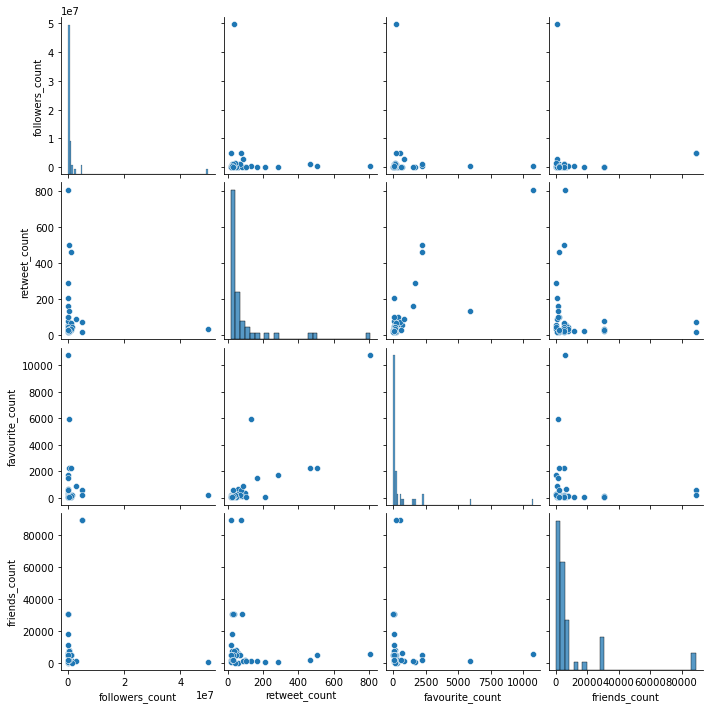

In [14]:
tweet_val = tweets_df[['followers_count','retweet_count','favourite_count','friends_count']]
ax = sns.pairplot(tweet_val)

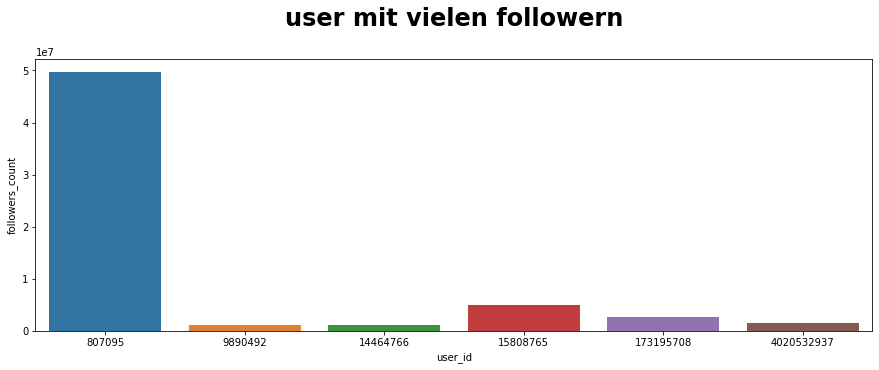

In [15]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen followern", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="followers_count", data=df_fol)

### Wer hat am meisten favourits?

In [16]:
favour_viele = tweets_df['favourite_count'].quantile(viele)
df_favour = tweets_df.loc[(tweets_df['favourite_count'] >= favour_viele)].drop_duplicates("user_name").sort_values(by=['favourite_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_favour

user_id                                 user_name  \
0              17396566                                     Petco   
29             32184345                           Nicola Coughlan   
2              14464766                                  moby XⓋX   
1             394087611                      Dr. Angela Rasmussen   
19  1204095351944368139                               Spike Cohen   
22             87371781  Imani Barbarin, MAGC | Crutches&Spice ♿️   
26            173195708                            Nigella Lawson   
4              15344145                               Dawn Foster   
44            189088175                         The Vegan Gorilla   

    followers_count  retweet_count  favourite_count  friends_count  
0            179193            808            10754           5602  
29           266032            134             5923           1365  
2           1159108            464             2232           1992  
1            209339            503             2224           4848  
19            65527            287             1700            217  
22            92187            164             1526           1187  
26          2745462             88              864            915  
4             87511             56              677           6360  
44            12705             28              575           1973

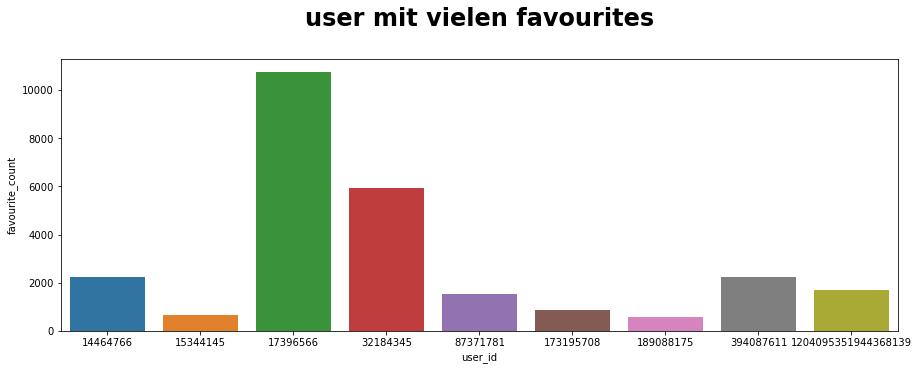

In [17]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen favourites", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="favourite_count", data=df_favour)

In [18]:
t_ret_viele = tweets_df['retweet_count'].quantile(viele)
df_ret = tweets_df.loc[(tweets_df['retweet_count'] >= t_ret_viele)].drop_duplicates("user_name").sort_values(by=['retweet_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_ret

user_id                                 user_name  \
0              17396566                                     Petco   
1             394087611                      Dr. Angela Rasmussen   
2              14464766                                  moby XⓋX   
19  1204095351944368139                               Spike Cohen   
15           1245158946                                The Social   
22             87371781  Imani Barbarin, MAGC | Crutches&Spice ♿️   
29             32184345                           Nicola Coughlan   
30             19257934                           Suzy Pelta 👩🏽‍🍳   
3            2659372678                  🇬🇧 Dr Dominic Pimenta 🇬🇧   

    followers_count  retweet_count  favourite_count  friends_count  
0            179193            808            10754           5602  
1            209339            503             2224           4848  
2           1159108            464             2232           1992  
19            65527            287             1700            217  
15           122333            208               82            517  
22            92187            164             1526           1187  
29           266032            134             5923           1365  
30            23174            103               60           1362  
3             53502            100              387           1723

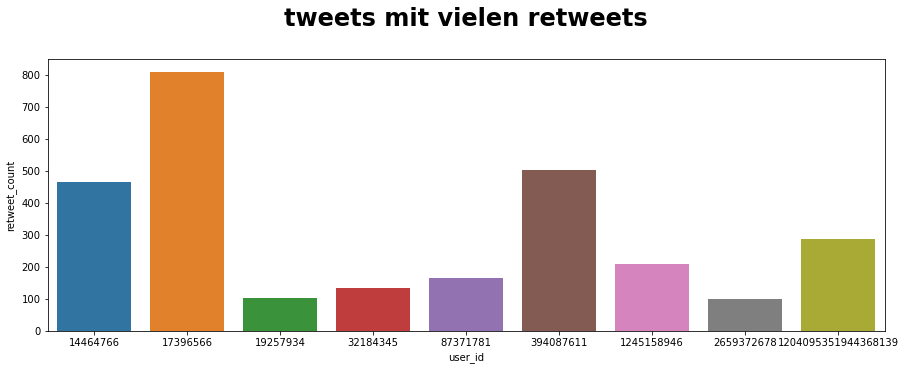

In [19]:
plt.figure(figsize=(15,5))
plt.title("tweets mit vielen retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="retweet_count", data=df_ret)

### Wer hat am meisten friends?¶

In [20]:
friends_viele = tweets_df['friends_count'].quantile(viele)
df_friends = tweets_df.loc[(tweets_df['friends_count'] >= friends_viele)].drop_duplicates("user_name").sort_values(by=['friends_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_friends

user_id     user_name  followers_count  retweet_count  favourite_count  \
7    15808765   Cory Booker          4962731             72              569   
9   357584312       PETA UK           100734             35               62   
14  452100948    Peter Egan            81739             24               79   
38   48702842  Erik Solheim           147304             20               80   
20   22956018    jann arden           335073             44              138   

    friends_count  
7           89013  
9           30478  
14          17828  
38          11189  
20           7907

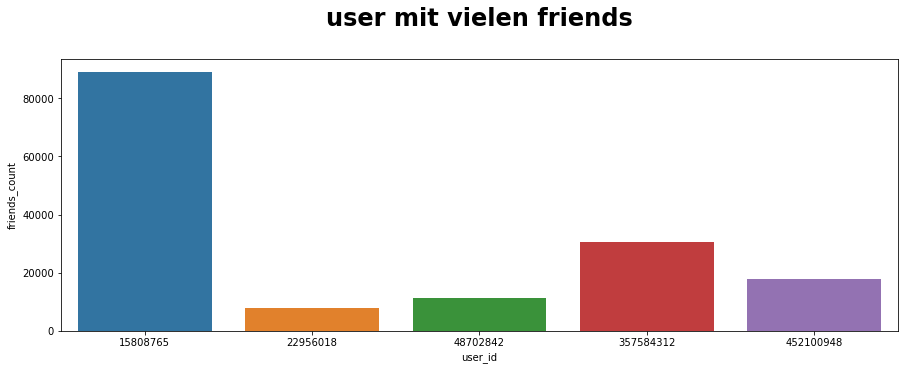

In [21]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen friends", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="friends_count", data=df_friends)

## Auswertung RT

In [22]:
retweets_val = retweets_df[['followers_count','retweet_count','friends_count']]

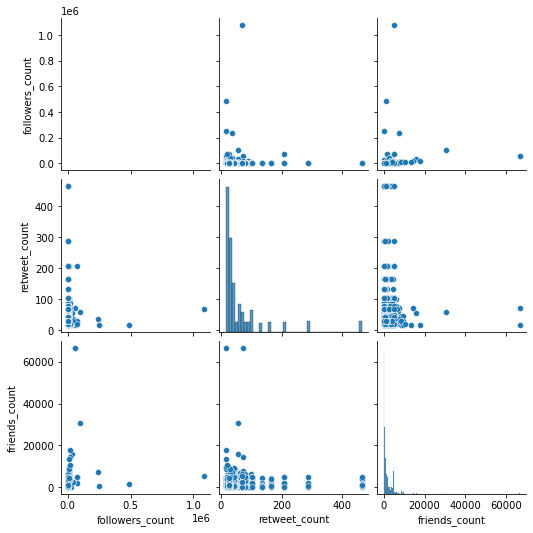

In [23]:
sns.set_context(font_scale=0.05)  
ax = sns.pairplot(retweets_val)

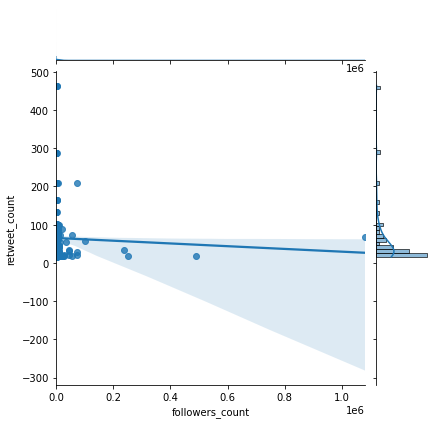

In [24]:
ax = sns.jointplot(x="followers_count", y="retweet_count", data=retweets_df, kind="reg")

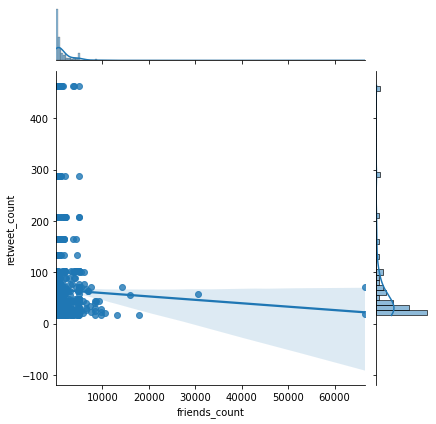

In [25]:

ax = sns.jointplot(x="friends_count", y="retweet_count", data=retweets_df, kind="reg")

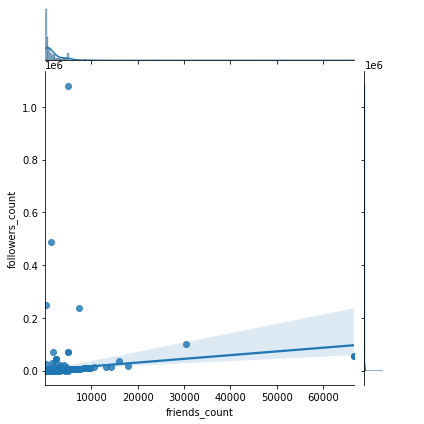

In [26]:
sns.jointplot(x="friends_count", y="followers_count", data=retweets_df, kind="reg");

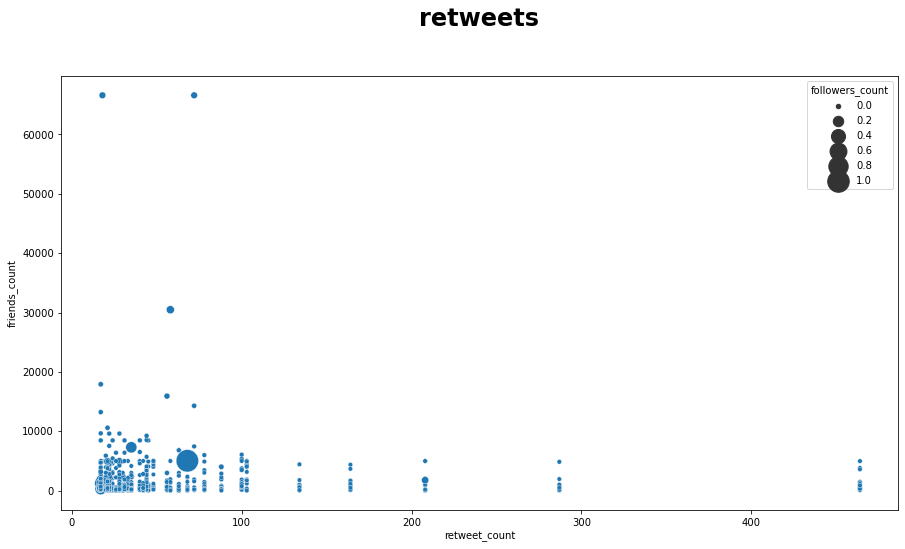

In [27]:
plt.figure(figsize=(15,8))
plt.title("retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
sns.set_context(font_scale=2)  
ax = sns.scatterplot(data=retweets_df, x="retweet_count", y="friends_count", size="followers_count", sizes = (20,500))

## Auswertung df

In [28]:
df_val = df[['followers_count_x','retweet_count_x','friends_count_x',  'followers_count_y','retweet_count_y','friends_count_y']]

### Gibt es tweeter, die auch retweeter sind?

In [29]:
subsetdf = df[df['user_id_x'].isin(['user_id_y']) ]
subsetdf

Empty DataFrame
Columns: [Unnamed: 0_x, tweet_id_x, creation_date_x, full_text_x, mentions_x, entities_hashtags_x, user_name_x, user_screen_name_x, user_id_x, location_x, description_x, protected_x, followers_count_x, friends_count_x, profile_created_at_x, retweet_count_x, favourite_count_x, search_key_x, Unnamed: 0_y, tweet_id_y, creation_date_y, full_text_y, mentions_y, entities_hashtags_y, user_name_y, user_screen_name_y, user_id_y, location_y, description_y, protected_y, followers_count_y, friends_count_y, profile_created_at_y, retweet_count_y, favourite_count_y, RT_of_ID, search_key_y]
Index: []

[0 rows x 37 columns]

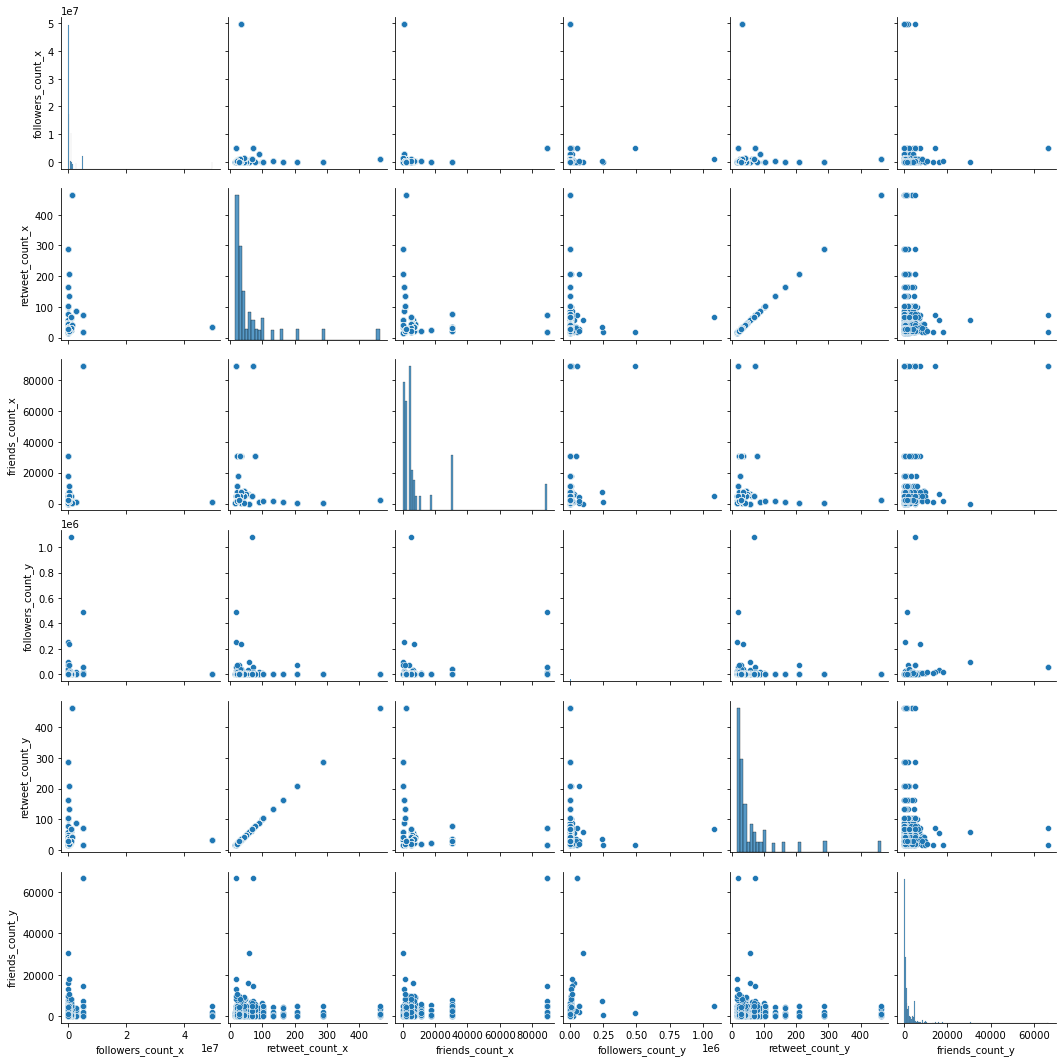

In [30]:
sns.set_context(font_scale= 0.1)  
ax = sns.pairplot(df_val)

## NetworkX

In [31]:
import networkx as nx
import warnings

In [32]:
# Read Our Edgelist
us_graph = nx.from_pandas_edgelist(df,source="user_name_x",target="user_name_y")

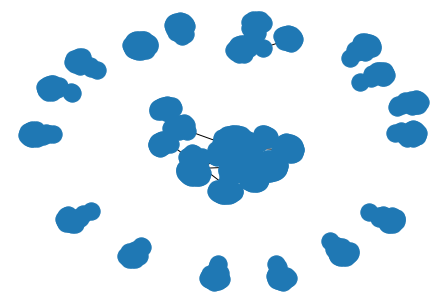

In [33]:
G = nx.from_pandas_edgelist(df,source="user_name_x",target="user_name_y")
nx.draw(G, with_labels=False)
plt.show()

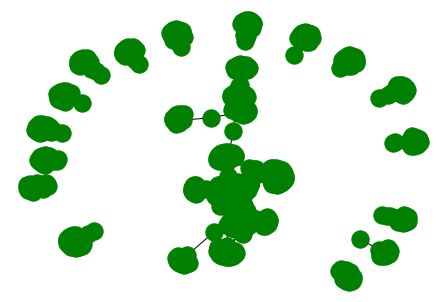

In [34]:
nx.draw(G, with_labels=False, node_color="g" )

In [35]:
type(G)

networkx.classes.graph.Graph

In [36]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 712\nNumber of edges: 727\nAverage degree:   2.0421'

In [37]:
G.nodes()
len(G.nodes)

712

## edge-analysis

In [38]:
G.edges()

EdgeView([('moby XⓋX', 'Minz 🌍 🕸 🧐'), ('moby XⓋX', 'miles vorkos'), ('moby XⓋX', 'aidan o driscoll'), ('moby XⓋX', 'Kishan Patel'), ('moby XⓋX', 'StopEatingAnimals'), ('moby XⓋX', 'Nicolas Giro'), ('moby XⓋX', 'ThatLittleSoyThing'), ('moby XⓋX', "Miley's Brother"), ('moby XⓋX', 'full_stack'), ('moby XⓋX', 'Amethyst Janes'), ('moby XⓋX', 'Hell-phistøpheles'), ('moby XⓋX', 'Jill Petersons'), ('moby XⓋX', 'Nana Sei'), ('moby XⓋX', 'Giulia - Sii il cambiamento che vuoi vedere'), ('moby XⓋX', 'Java Ship Coffee'), ('moby XⓋX', 'W I B E R G'), ('moby XⓋX', 'Vegan Me'), ('moby XⓋX', '「 猫の男😸 」'), ('moby XⓋX', '🐾ActivistaMX🌎'), ('🇬🇧 Dr Dominic Pimenta 🇬🇧', 'Frank Davies'), ('🇬🇧 Dr Dominic Pimenta 🇬🇧', 'pocketbelt'), ('🇬🇧 Dr Dominic Pimenta 🇬🇧', "[lysithea voice] no, YOU'RE baby *unmakes you*"), ('🇬🇧 Dr Dominic Pimenta 🇬🇧', 'Dave. (Still Laughing At The Fascists) IMP'), ('🇬🇧 Dr Dominic Pimenta 🇬🇧', 'Lee Dobson'), ('🇬🇧 Dr Dominic Pimenta 🇬🇧', 'Thom_Ntinas_Sound'), ('🇬🇧 Dr Dominic Pimenta 🇬🇧', 'Aud

In [39]:
len(G.edges())

727

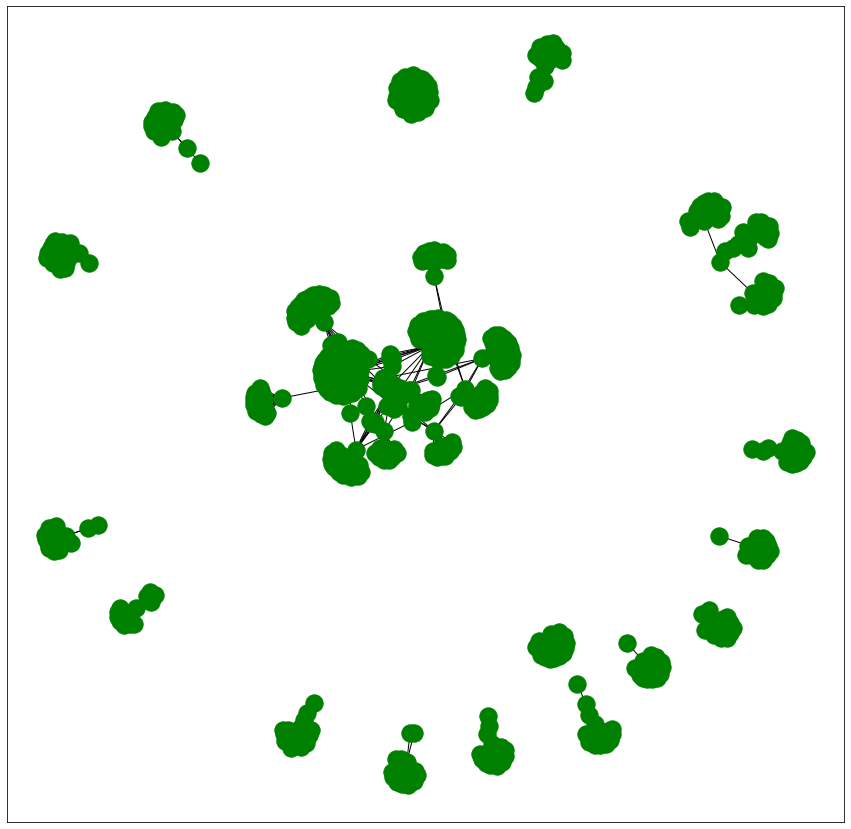

In [40]:
plt.figure(figsize= (15,15))
nx.draw_networkx(G, with_labels=False, node_color="g" )

## Measures
* Degree Centrality
* Most Influental
*


In [41]:
nx.degree(G)

DegreeView({'moby XⓋX': 19, 'Minz 🌍 🕸 🧐': 1, 'miles vorkos': 1, 'aidan o driscoll': 1, 'Kishan Patel': 1, 'StopEatingAnimals': 1, 'Nicolas Giro': 1, 'ThatLittleSoyThing': 1, "Miley's Brother": 1, 'full_stack': 1, 'Amethyst Janes': 1, 'Hell-phistøpheles': 1, 'Jill Petersons': 1, 'Nana Sei': 1, 'Giulia - Sii il cambiamento che vuoi vedere': 1, 'Java Ship Coffee': 1, 'W I B E R G': 1, 'Vegan Me': 1, '「 猫の男😸 」': 1, '🐾ActivistaMX🌎': 1, '🇬🇧 Dr Dominic Pimenta 🇬🇧': 18, 'Frank Davies': 1, 'pocketbelt': 1, "[lysithea voice] no, YOU'RE baby *unmakes you*": 1, 'Dave. (Still Laughing At The Fascists) IMP': 1, 'Lee Dobson': 1, 'Thom_Ntinas_Sound': 1, 'Audrey': 1, 'aina(‘s bones are aching)': 1, 'Jonathan Reed🇪🇺🌹': 1, 'Miranda Jones💙': 1, 'LGConnolly💙☘🇪🇺#IamEuropean#fbpe': 1, 'Eamon Cassells': 1, 'Christopher Wood': 1, 'Catherine Langley Zamojski💙🇿🇦🇪🇺': 1, 'i said what the fuck i said': 1, 'Kirk Murphy': 1, 'Saskboy from Saskatchewan': 1, 'Faun Kime': 1, 'Dawn Foster': 16, 'Middleaged 🕷': 1, 'Kounsh

In [42]:
# id 22956018 hat 19 Kontakte

nx.degree(G,"Cousin Grexit")

1

# Wer hat am meisten Einfluss?
nx.degree_centrality(G)

In [43]:
sorted(nx.degree_centrality(G).values(), reverse=True)

[0.1209563994374121,
 0.09142053445850915,
 0.06469760900140648,
 0.05625879043600562,
 0.052039381153305204,
 0.0450070323488045,
 0.02812939521800281,
 0.02812939521800281,
 0.02812939521800281,
 0.026722925457102673,
 0.026722925457102673,
 0.026722925457102673,
 0.026722925457102673,
 0.026722925457102673,
 0.026722925457102673,
 0.02531645569620253,
 0.02531645569620253,
 0.02531645569620253,
 0.02531645569620253,
 0.02531645569620253,
 0.02531645569620253,
 0.02531645569620253,
 0.023909985935302393,
 0.023909985935302393,
 0.02250351617440225,
 0.02250351617440225,
 0.02250351617440225,
 0.02109704641350211,
 0.02109704641350211,
 0.01969057665260197,
 0.0042194092827004225,
 0.0042194092827004225,
 0.0042194092827004225,
 0.0042194092827004225,
 0.0028129395218002813,
 0.0028129395218002813,
 0.0028129395218002813,
 0.0028129395218002813,
 0.0028129395218002813,
 0.0028129395218002813,
 0.0028129395218002813,
 0.0028129395218002813,
 0.0028129395218002813,
 0.002812939521800281

In [44]:
most_influential = nx.degree_centrality(G)
for id_tw in sorted(most_influential, key =most_influential.get, reverse = True):
    print("Influencer:", id_tw, "centrality", most_influential[id_tw])

Influencer: PETA centrality 0.1209563994374121
Influencer: PETA UK centrality 0.09142053445850915
Influencer: Mercy For Animals centrality 0.06469760900140648
Influencer: The Vegan Society centrality 0.05625879043600562
Influencer: Vegan Outreach centrality 0.052039381153305204
Influencer: Cory Booker centrality 0.0450070323488045
Influencer: Pomp 🌪 centrality 0.02812939521800281
Influencer: Peter Egan centrality 0.02812939521800281
Influencer: Gad Saad centrality 0.02812939521800281
Influencer: moby XⓋX centrality 0.026722925457102673
Influencer: Spike Cohen centrality 0.026722925457102673
Influencer: jann arden centrality 0.026722925457102673
Influencer: Plant Based News centrality 0.026722925457102673
Influencer: Suzy Pelta 👩🏽‍🍳 centrality 0.026722925457102673
Influencer: Erik Solheim centrality 0.026722925457102673
Influencer: 🇬🇧 Dr Dominic Pimenta 🇬🇧 centrality 0.02531645569620253
Influencer: The Social centrality 0.02531645569620253
Influencer: The New York Times centrality 0.025

Influencer: ann-marie evans centrality 0.0014064697609001407
Influencer: DT centrality 0.0014064697609001407
Influencer: Toxic centrality 0.0014064697609001407
Influencer: g centrality 0.0014064697609001407
Influencer: DoubleDownNow! centrality 0.0014064697609001407
Influencer: Lily Purtak centrality 0.0014064697609001407
Influencer: stream Sweet Melody 🔥 centrality 0.0014064697609001407
Influencer: Cephalopodz 🍞🌹🌍 centrality 0.0014064697609001407
Influencer: biljana tadic centrality 0.0014064697609001407
Influencer: Ajay Kumar🐾🐎🐊🐂🐃🐏🐑🐕🐮🦝🐬🐳🐘🐟🐖🐂🐍🐾 centrality 0.0014064697609001407
Influencer: lsdarius centrality 0.0014064697609001407
Influencer: Marie DIAS centrality 0.0014064697609001407
Influencer: paul hind centrality 0.0014064697609001407
Influencer: rex tyler DTM centrality 0.0014064697609001407
Influencer: Curtis paul singh centrality 0.0014064697609001407
Influencer: Kätzchen mit Krallen 3 centrality 0.0014064697609001407
Influencer: Leticia centrality 0.0014064697609001407
Influen

### Most important connection eigenvector

In [45]:
most_important_connection = nx.eigenvector_centrality(G)
most_important_connection

{'moby XⓋX': 3.7964153451858386e-13,
 'Minz 🌍 🕸 🧐': 8.709573991309556e-14,
 'miles vorkos': 8.709573991309556e-14,
 'aidan o driscoll': 8.709573991309556e-14,
 'Kishan Patel': 8.709573991309556e-14,
 'StopEatingAnimals': 8.709573991309556e-14,
 'Nicolas Giro': 8.709573991309556e-14,
 'ThatLittleSoyThing': 8.709573991309556e-14,
 "Miley's Brother": 8.709573991309556e-14,
 'full_stack': 8.709573991309556e-14,
 'Amethyst Janes': 8.709573991309556e-14,
 'Hell-phistøpheles': 8.709573991309556e-14,
 'Jill Petersons': 8.709573991309556e-14,
 'Nana Sei': 8.709573991309556e-14,
 'Giulia - Sii il cambiamento che vuoi vedere': 8.709573991309556e-14,
 'Java Ship Coffee': 8.709573991309556e-14,
 'W I B E R G': 8.709573991309556e-14,
 'Vegan Me': 8.709573991309556e-14,
 '「 猫の男😸 」': 8.709573991309556e-14,
 '🐾ActivistaMX🌎': 8.709573991309556e-14,
 '🇬🇧 Dr Dominic Pimenta 🇬🇧': 1.5789005349302116e-13,
 'Frank Davies': 3.7215042166769854e-14,
 'pocketbelt': 3.7215042166769854e-14,
 "[lysithea voice] no, Y

In [46]:
for id_tw in sorted(most_important_connection,key = most_important_connection.get, reverse = True):
    print("Connector: ", id_tw)

Connector:  PETA
Connector:  PETA UK
Connector:  Mercedes Fernandez
Connector:  Roberto
Connector:  Emily🦋
Connector:  Gisella Vargas 🇩🇴🇵🇷
Connector:  KP🌎🌱😷
Connector:  Andrew Higgs
Connector:  Béatrice C
Connector:  Fariba Parniani
Connector:  Les FabianⓋ
Connector:  brad
Connector:  Juliet Johns Pearson
Connector:  Leafs4Ever🇨🇦
Connector:  Cynthia
Connector:  VeganSchmoozequeen
Connector:  Nathalie
Connector:  Mercy For Animals
Connector:  Michelle
Connector:  Drdave Anddee
Connector:  狼少女
Connector:  티나 🇹🇷
Connector:  イルカショーをボイコットをしよう🌱
Connector:  Nina Clark 💙
Connector:  𝘼𝖗ꪀ𝒂𝕧 ƙ𝖆ꪊ𝐒𝒽𝖎𝐊
Connector:  Seifer Of Balamb
Connector:  Anita
Connector:  イルカショーをボイコットをしよう
Connector:  Ewa
Connector:  Twetch/u/1622
Connector:  Pita Louise
Connector:  Cécile Schmitter
Connector:  IRENE TRESP
Connector:  #イルカショーを絶対見ない! #イルカ殺戮を絶対許さない! Ⓥ🌱
Connector:  Natalia
Connector:  Deborah Efron
Connector:  Naughty_vegan piglet 🌱
Connector:  Cinzia Di Pietro
Connector:  Bill
Connector:  rhiannon cahill
Connector

### What is the shortest connection between ....

In [47]:
def path(graph,a,b):    
    try: return(nx.shortest_path(graph,a, b))
    except: return("no connection")

In [48]:
a = "Cousin Grexit"
b = 'Linda Mann'
path(G,a,b)

['Cousin Grexit',
 'The Social',
 'Ava',
 'Suzy Pelta 👩🏽\u200d🍳',
 'Sustainable Living',
 'Vegan Outreach',
 'Drdave Anddee',
 'PETA',
 'Linda Mann']

### Betweenness-Centrality

In [49]:
nx.betweenness_centrality(G)

{'moby XⓋX': 0.0006774826172223213,
 'Minz 🌍 🕸 🧐': 0.0,
 'miles vorkos': 0.0,
 'aidan o driscoll': 0.0,
 'Kishan Patel': 0.0,
 'StopEatingAnimals': 0.0,
 'Nicolas Giro': 0.0,
 'ThatLittleSoyThing': 0.0,
 "Miley's Brother": 0.0,
 'full_stack': 0.0,
 'Amethyst Janes': 0.0,
 'Hell-phistøpheles': 0.0,
 'Jill Petersons': 0.0,
 'Nana Sei': 0.0,
 'Giulia - Sii il cambiamento che vuoi vedere': 0.0,
 'Java Ship Coffee': 0.0,
 'W I B E R G': 0.0,
 'Vegan Me': 0.0,
 '「 猫の男😸 」': 0.0,
 '🐾ActivistaMX🌎': 0.0,
 '🇬🇧 Dr Dominic Pimenta 🇬🇧': 0.0006061686575147086,
 'Frank Davies': 0.0,
 'pocketbelt': 0.0,
 "[lysithea voice] no, YOU'RE baby *unmakes you*": 0.0,
 'Dave. (Still Laughing At The Fascists) IMP': 0.0,
 'Lee Dobson': 0.0,
 'Thom_Ntinas_Sound': 0.0,
 'Audrey': 0.0,
 'aina(‘s bones are aching)': 0.0,
 'Jonathan Reed🇪🇺🌹': 0.0,
 'Miranda Jones💙': 0.0,
 'LGConnolly💙☘🇪🇺#IamEuropean#fbpe': 0.0,
 'Eamon Cassells': 0.0,
 'Christopher Wood': 0.0,
 'Catherine Langley Zamojski💙🇿🇦🇪🇺': 0.0,
 'i said what the 

In [50]:
best_connector = nx.betweenness_centrality(G)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

FARM Animal Rights 0.10184303665405446
PETA 0.10091916399160719
Vegan Outreach 0.08590289038497245
PETA UK 0.08449581690801185
Mercy For Animals 0.062018776198368535
Suzy Pelta 👩🏽‍🍳 0.047302945662724596
Sustainable Living 0.04678195756819398
The Vegan Society 0.04563697232622175
Roberto 0.04421426511876389
Maria Creasey 0.03891417893200731
Peter Egan 0.026647649610744638
Plant Based News 0.026629957900237783
Drdave Anddee 0.024033483602034125
The Social 0.022537192210930847
please be kind to all animals ⓥ 0.021842560284350252
Ingrid Newkirk 0.021073628833479054
PETA Asia 0.020435964749270775
Fariba Parniani 0.011806656472669442
ANNA MAIETTA 0.011656398777097647
coconut 0.011656398777097647
Ava 0.011651908638893843
TREV 0.011651908638893843
狼少女 0.010824440312762659
Mercedes Fernandez 0.009411782462237095
Beach Cat 0.007185805880760427
Afterstorm 0.006685268667796747
Lightspeed 0.006685268667796747
meowss 0.006685268667796747
rsarhh 0.006685268667796747
Dragofix 0.006685268667796747
Mich

### Untergruppen

C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 119820 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 119834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 119851 missing fro

C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 119818 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32118 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23550 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35211 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12356 missing from 

C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128002 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128003 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128015 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128017 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128021 missing 

C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127801 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127808 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2384 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2307 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2358 missing from current font.

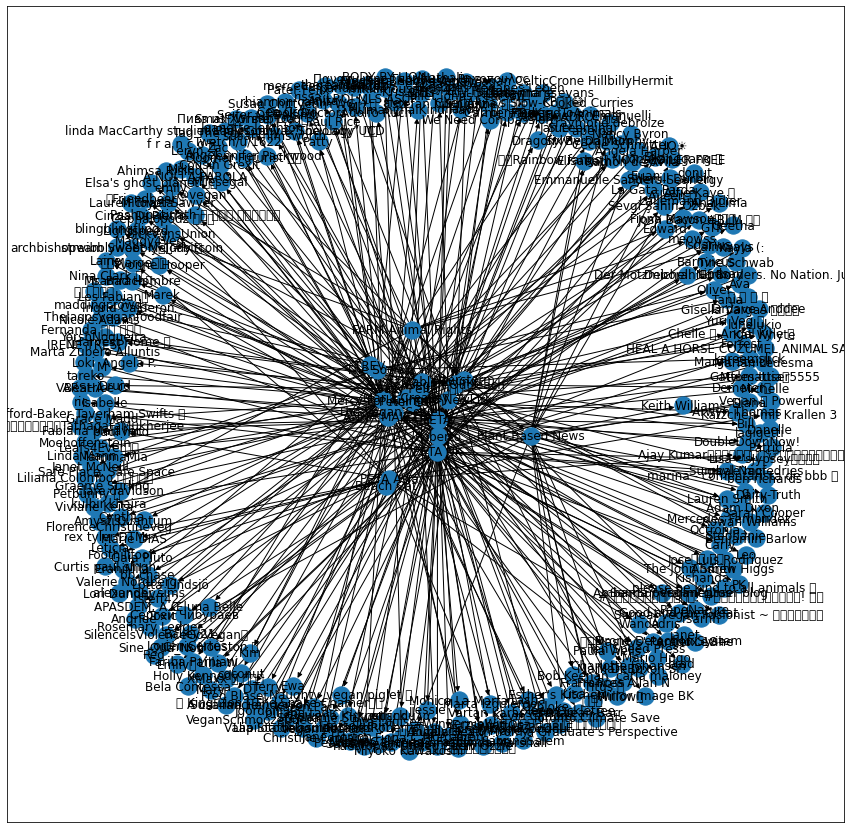

In [51]:
plt.figure(figsize= (15,15))
group1 = nx.bfs_tree(G,"FARM Animal Rights")
nx.draw_networkx(group1)

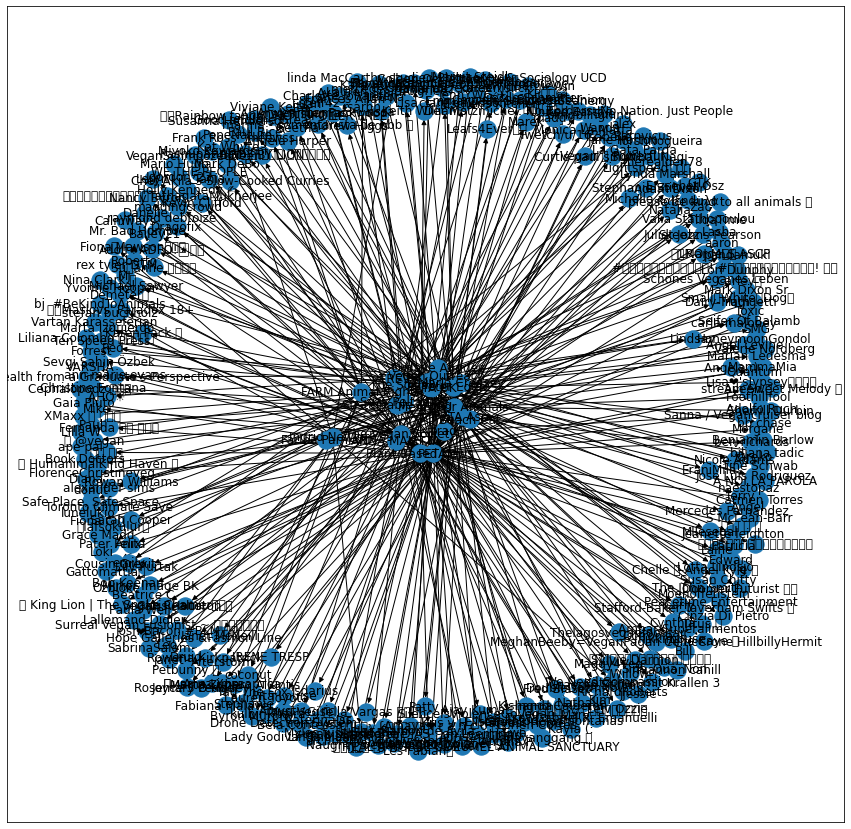

In [52]:
plt.figure(figsize= (15,15))
group2 = nx.bfs_tree(G,"brad")
nx.draw_networkx(group2)

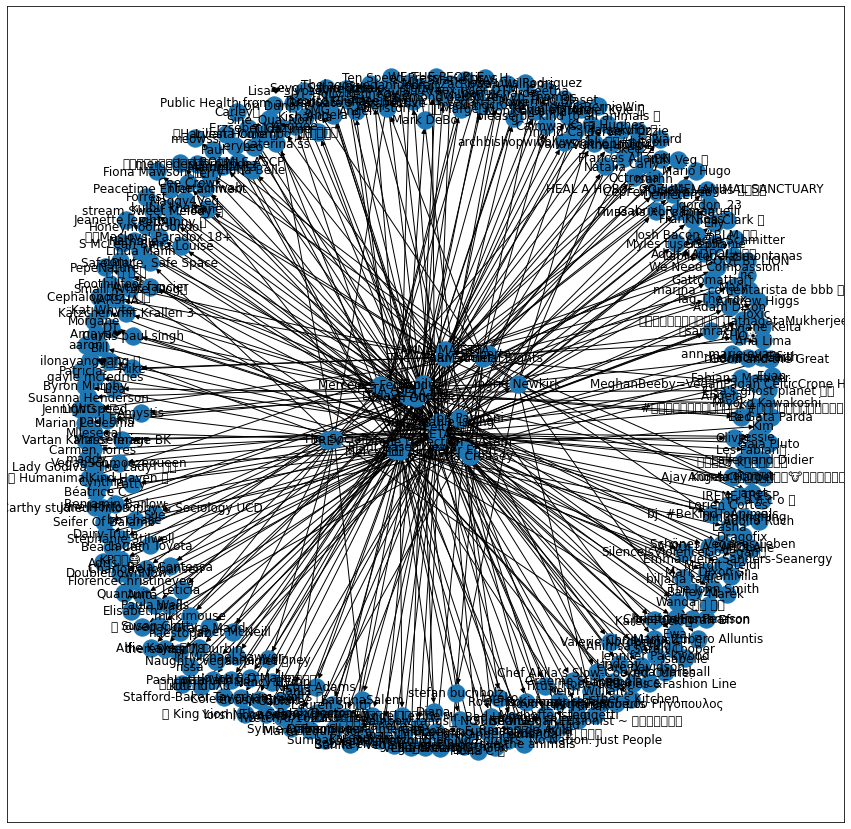

In [53]:
plt.figure(figsize= (15,15))
group3 = nx.bfs_tree(G,"Drone Detection System")
nx.draw_networkx(group3)


C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128375 missing from current font.
  font.set_text(s, 0, flags=flags)


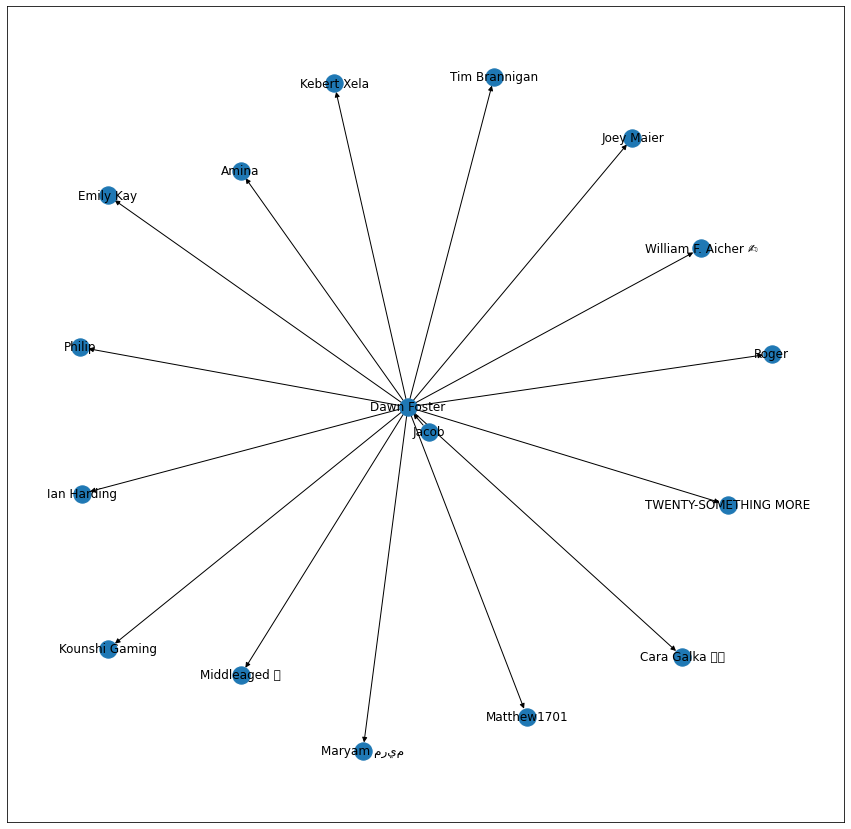

In [54]:
plt.figure(figsize= (15,15))
group4 = nx.bfs_tree(G,"Jacob")
nx.draw_networkx(group4)


C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\thoma\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30007 missing from

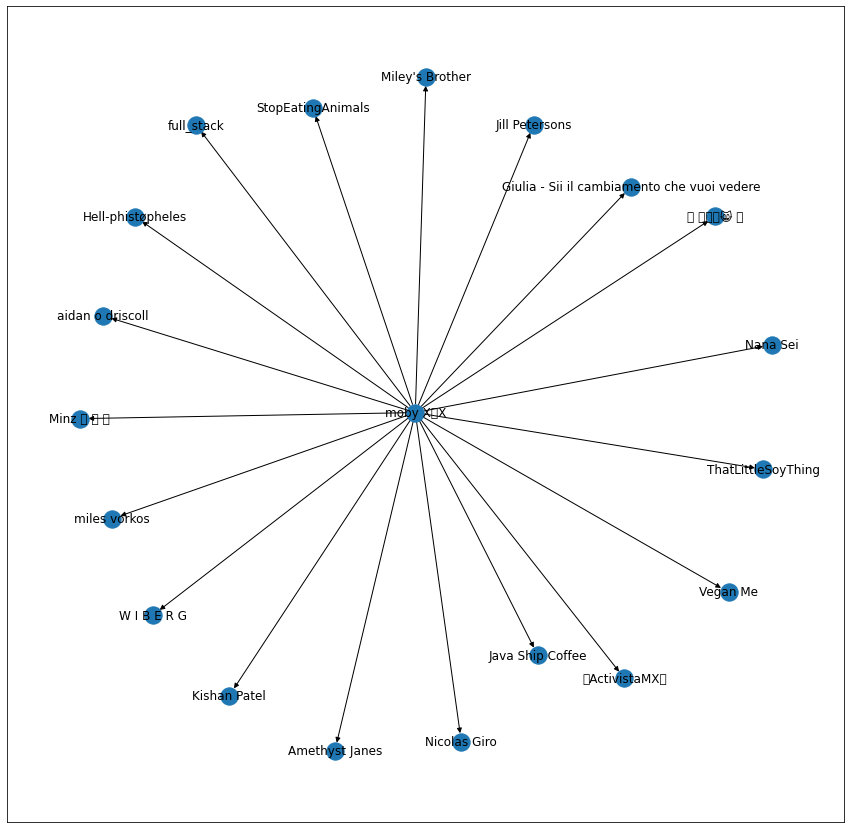

In [55]:
plt.figure(figsize= (15,15))
group5 = nx.bfs_tree(G,"moby XⓋX")
nx.draw_networkx(group5)
